In [162]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh as tr

### Распарсим входной файл

In [163]:
def parse(filename):
        vertexList = []
        parts_list = []
        one_part_list = []
        vertices = []
        faces = []
        vertices_list = []
        faces_list = []
        with open(filename, 'r') as objFile:
            for line in objFile:
                if 'object Part' in line:
                    print(line)
                if 'object Part' in line and len(one_part_list) > 0:
                    parts_list.append(one_part_list)
                    vertices.append(vertices_list)
                    faces.append(faces_list)
                    one_part_list = []
                    vertices_list = []
                    faces_list = []

                split = line.split()
                if not len(split):
                    continue
                
                if split[0] == "v":
                    vertexList.append([float(val) for val in split[1:]])
                    vertices_list.append([float(val) for val in split[1:]])
                
                elif split[0] == "f":
                    face = []
                    faces_list.append([float(val) for val in split[1:]])
                    for idx in split[1:]:
                        face.append(vertexList[int(idx) - 1])
                    one_part_list.append(face)
            
            parts_list.append(one_part_list)
            vertices.append(vertices_list)
            faces.append(faces_list)

        normals_list = []
        for part in parts_list:
            normals_list_part = []
            for surface in part:
                a = np.array(surface[2]) - np.array(surface[0])
                b = np.array(surface[1]) - np.array(surface[0])
                cross_product = -np.cross(a, b)
                normals_list_part.append((cross_product / np.linalg.norm(cross_product)).tolist())
            normals_list.append(normals_list_part)

        return parts_list, normals_list, vertices, faces
    
parts_list, normals_list, vertices, faces = parse("model2.obj")

# object Part1

# object Part2

# object Part4

# object Part3

# object Part5



Стоит заметить, что в файле model2.obj части фигуры part3 и part4 идут в неправильном порядке, исправим это:

In [164]:
buf = parts_list[2]
parts_list[2] = parts_list[3]
parts_list[3] = buf

### Найдём площадь кааждой из фигур S_ij в отдельности

In [165]:
def triangle_area(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)
    return 0.5 * np.linalg.norm(np.cross(b - a, c - a))

def area(x, y):
    x, y = np.array(x), np.array(y)
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


S_ij = np.zeros((5, 5))

for i, part in enumerate(parts_list):
    for surface in part:
        S_ij[i, i] += triangle_area(*surface)
        
S_ij

array([[ 36.1672017 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  99.40769069,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 268.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,  12.36601433,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        219.83410973]])

### Площадь между фигурами part3/part4 и part4/part5

In [174]:
y, z = [], []
tmp_verts = []
for surface in parts_list[0]:
    for second_surface in parts_list[1]:
        for vert in surface:
            for second_vert in second_surface:
                if (vert[2] == second_vert[2]) and (not vert in tmp_verts):
                    y.append(vert[0])
                    z.append(vert[1])
                    tmp_verts.append(vert)
print(y)
print(z)

[0.0, 0.4619, 0.5, 0.3536, 0.1913, -0.0, -0.1913, -0.3536, -0.4619, -0.5, -0.4619, -0.3536, -0.1913, 0.0, 0.1913, 0.3536, 0.4619, 0.9239, 1.0, 0.7071, 0.3827, -0.0, -0.3827, -0.7071, -0.9239, -1.0, -0.9239, -0.7071, -0.3827, 0.0, 0.3827, 0.7071, 0.9239, 1.3858, 1.5, 1.0607, 0.574, -0.0, -0.574, -1.0607, -1.3858, -1.5, -1.3858, -1.0607, -0.574, 0.0, 0.574, 1.0607, 1.3858, 1.8478, 2.0, 1.4142, 0.7654, -0.0, -0.7654, -1.4142, -1.8478, -2.0, -1.8478, -1.4142, -0.7654, 0.0, 0.7654, 1.4142, 1.8478]
[0.0, 0.1913, 0.0, 0.3536, 0.4619, 0.5, 0.4619, 0.3536, 0.1913, 0.0, -0.1913, -0.3536, -0.4619, -0.5, -0.4619, -0.3536, -0.1913, 0.3827, 0.0, 0.7071, 0.9239, 1.0, 0.9239, 0.7071, 0.3827, 0.0, -0.3827, -0.7071, -0.9239, -1.0, -0.9239, -0.7071, -0.3827, 0.574, 0.0, 1.0607, 1.3858, 1.5, 1.3858, 1.0607, 0.574, 0.0, -0.574, -1.0607, -1.3858, -1.5, -1.3858, -1.0607, -0.574, 0.7654, 0.0, 1.4142, 1.8478, 2.0, 1.8478, 1.4142, 0.7654, 0.0, -0.7654, -1.4142, -1.8478, -2.0, -1.8478, -1.4142, -0.7654]


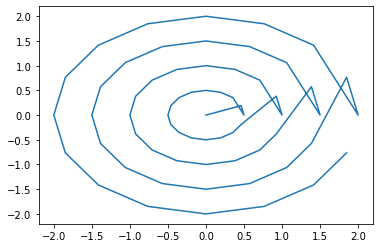

In [175]:
plt.plot(y, z)

In [176]:
y = [2.0, 1.8478, 1.4142, 0.7654, -0.0, -0.7654, -1.4142, -1.8478, -2.0, -1.8478, -1.4142, -0.7654, 0.0, 0.7654, 1.4142, 1.8478, 2.0]
z = [0.0, 0.7654, 1.4142, 1.8478, 2.0, 1.8478, 1.4142, 0.7654, 0.0, -0.7654, -1.4142, -1.8478, -2.0, -1.8478, -1.4142, -0.7654, 0.0]

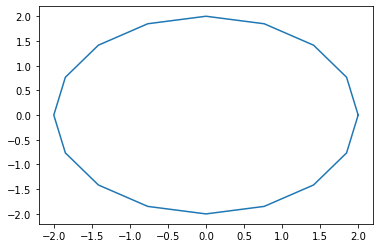

In [177]:
plt.plot(y, z)

In [178]:
square_1_2_3 = area(y, z)
square_1_2_3

12.246120320000003

### Площадь между фигурами part1/part2 и part2/part3

In [179]:
x, z = [], []
tmp_verts = []
for surface in parts_list[3]:
    for second_surface in parts_list[4]:
        for vert in surface:
            for second_vert in second_surface:
                if (vert[1] == second_vert[1]) and (not vert in tmp_verts):
                    x.append(vert[0])
                    z.append(vert[2])
                    tmp_verts.append(vert)
print(x)
print(z)

[0.9239, 1.0, 0.7071, 0.3827, -0.0, -0.3827, -0.7071, -0.9239, -1.0, -0.9239, -0.7071, -0.3827, -0.0, 0.3827, 0.7071, 0.9239, 0.6929, 0.75, 0.5303, 0.287, -0.0, -0.287, -0.5303, -0.6929, -0.75, -0.6929, -0.5303, -0.287, -0.0, 0.287, 0.5303, 0.6929, 0.4619, 0.5, 0.3536, 0.1913, -0.0, -0.1913, -0.3536, -0.4619, -0.5, -0.4619, -0.3536, -0.1913, -0.0, 0.1913, 0.3536, 0.4619, 0.231, 0.25, 0.1768, 0.0957, -0.0, -0.0957, -0.1768, -0.231, -0.25, -0.231, -0.1768, -0.0957, -0.0, 0.0957, 0.1768, 0.231, -0.0]
[-1.1173, -1.5, -0.7929, -0.5761, -0.5, -0.5761, -0.7929, -1.1173, -1.5, -1.8827, -2.2071, -2.4239, -2.5, -2.4239, -2.2071, -1.8827, -1.213, -1.5, -0.9697, -0.8071, -0.75, -0.8071, -0.9697, -1.213, -1.5, -1.787, -2.0303, -2.1929, -2.25, -2.1929, -2.0303, -1.787, -1.3087, -1.5, -1.1464, -1.0381, -1.0, -1.0381, -1.1464, -1.3087, -1.5, -1.6913, -1.8536, -1.9619, -2.0, -1.9619, -1.8536, -1.6913, -1.4043, -1.5, -1.3232, -1.269, -1.25, -1.269, -1.3232, -1.4043, -1.5, -1.5957, -1.6768, -1.731, -1.75

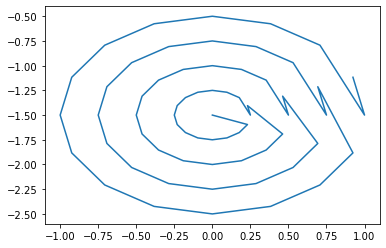

In [180]:
plt.plot(x, z)

In [181]:
x = [1.0, 0.9239, 0.7071, 0.3827, -0.0, -0.3827, -0.7071, -0.9239, -1.0,
    -0.9239, -0.7071, -0.3827, -0.0, 0.3827, 0.7071, 0.9239, 1.0]
z = [-1.5, -1.1173, -0.7929, -0.5761, -0.5, -0.5761, -0.7929, -1.1173, -1.5,
     -1.8827, -2.2071, -2.4239, -2.5, -2.4239, -2.2071, -1.8827, -1.5]

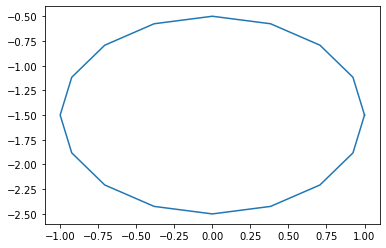

In [182]:
plt.plot(x, z)

In [183]:
square_3_4_5 = area(x, z)
square_3_4_5

3.06153008

### Сохраним результат в виде матрицы в формате csv:

In [184]:
S_ij[1, 0] = S_ij[0, 1] = square_1_2_3
S_ij[2, 1] = S_ij[1, 2] = square_1_2_3

In [187]:
S_ij[3, 2] = S_ij[2, 3] = square_3_4_5
S_ij[4, 3] = S_ij[3, 4] = square_3_4_5

In [188]:
print(S_ij)

[[ 36.1672017   12.24612032   0.           0.           0.        ]
 [ 12.24612032  99.40769069  12.24612032   0.           0.        ]
 [  0.          12.24612032 268.           3.06153008   0.        ]
 [  0.           0.           3.06153008  12.36601433   3.06153008]
 [  0.           0.           0.           3.06153008 219.83410973]]


In [190]:
np.savetxt("S_ij.csv", S_ij, delimiter=";")